In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.signal import butter as bw
from scipy.signal import dbode
from scipy.signal import TransferFunction

In [ ]:
def multi_sort(*args, reverse=True):
    sorted_lists = (list(t) for t in zip(*sorted(zip(*args), reverse=reverse)))
    return tuple(sorted_lists)

multi_sort([3,1,2], ['c','a','b'], [1,2,3], reverse=False)

subjects = np.arange(52)+1
subjects = np.delete(subjects,[28,33]) # delete 29 and 34
subjects_2 = np.arange(50)

In [ ]:
df = pd.read_excel('/content/EEG State of the Art Results + CAMS.xlsx', index_col=0, sheet_name='Transposed')

In [ ]:
df

,KREEGNet,EEGNet,DeepConvNet,ShallowConvNet,TCFusionNet,KCS-FCNet,KCS-FCNet RFF,CSP
Mean acc,0.779000,0.744000,0.619000,0.725000,0.739000,0.741176,0.656718,0.676592
Std acc,0.132000,0.149000,0.124000,0.141000,0.148000,0.118118,0.132245,0.138123
Mean kappa,0.557000,0.486000,0.236000,0.446000,0.480000,0.480677,0.690079,0.348187
Std kappa,0.265000,0.298000,0.249000,0.283000,0.300000,0.236799,0.265387,0.278652
Mean auc,0.825000,0.796000,0.660000,0.779000,0.800000,0.806478,0.704750,0.673894
Std auc,0.145000,0.164000,0.160000,0.153000,0.163000,0.129179,0.153976,0.139459
Mean f1 left,0.771080,0.732560,0.594540,0.717720,0.733660,0.904934,0.645820,0.000000
Std f1 left,0.138257,0.157966,0.135692,0.146598,0.153277,0.090828,0.146476,0.000000
Mean f1 right,0.775500,0.744400,0.630600,0.723860,0.739480,0.904934,0.657387,0.000000
Std f1 right,0.140481,0.154882,0.130879,0.144153,0.146912,0.090828,0.137468,0.000000


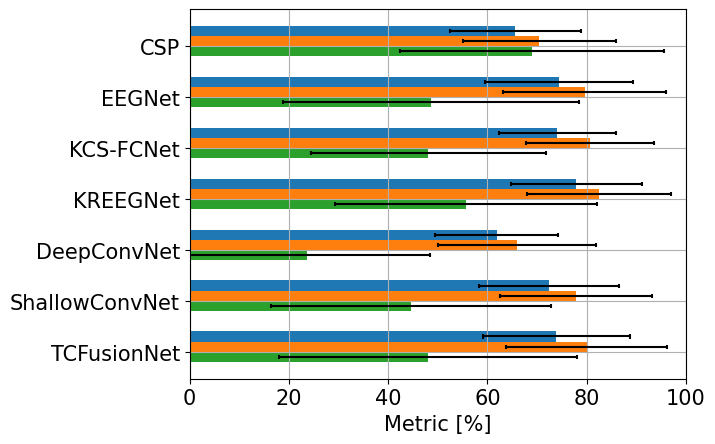

In [ ]:
models = np.array(df.columns.values)
models = np.delete(models, -2)
models[0], models[1], models[2], models[3], models[4], models[5] = (models[4], models[3],
                                                            models[2], models[0],
                                                            models[5], models[1])
xticks = np.arange(len(models))
width = 0.2

plt.grid(True)
for i, metric in enumerate([' acc', ' auc', ' kappa']):
    percentages = np.array([x*100 for x in df.loc[f'Mean{metric}'].values])[:-1]
    stds = np.array([x*100 for x in df.loc[f'Std{metric}'].values], )[:-1]

    percentages[0], percentages[1], percentages[2], percentages[3], percentages[4], percentages[5] = (percentages[4], percentages[3],
                                                                                                      percentages[2], percentages[0],
                                                                                                       percentages[5], percentages[1])
    stds[0], stds[1], stds[2], stds[3], stds[4], stds[5] = (stds[4], stds[3],
                                                            stds[2], stds[0],
                                                            stds[5], stds[1])

    padding = (-i+1.5)*width

    plt.barh(xticks+padding, percentages, height = width)

    plt.hlines(xticks+padding, percentages-stds, percentages+stds, colors='black')
    plt.vlines(percentages-stds, xticks+padding-width*0.2, xticks+padding+width*0.2, colors= 'black')
    plt.vlines(percentages+stds, xticks+padding-width*0.2, xticks+padding+width*0.2, colors= 'black')

plt.xlim(0,100)
locs, labels = plt.xticks()
labels = [f'{x.get_text()}' for x in labels]
plt.xticks(locs, labels, size=15)
plt.xlabel('Metric [%]', size=15)
plt.yticks(xticks, models, rotation=0, ha='right', size=15)
plt.savefig("Model Metrics.pdf", bbox_inches='tight')
plt.show()


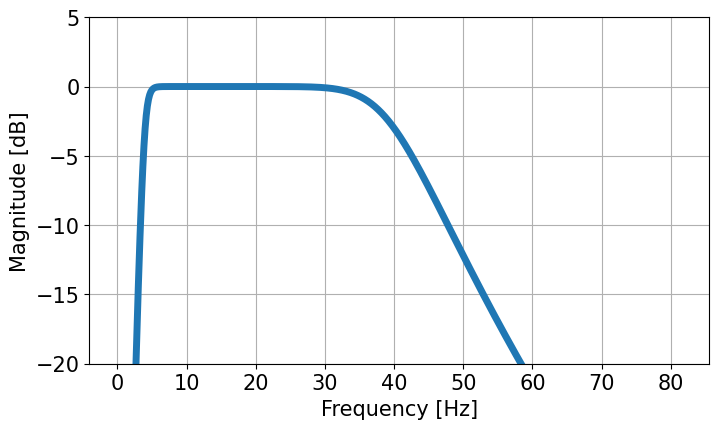

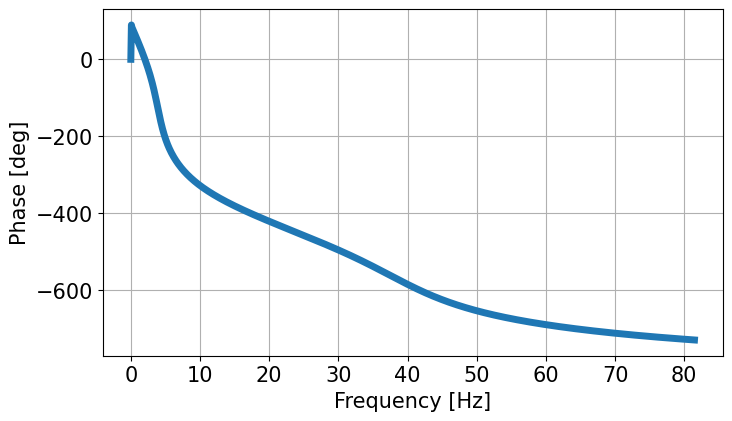

In [ ]:
#Bode
rad = 2*np.pi
num, den = bw(N=5, Wn=(4, 40), btype='bandpass', analog=False, output='ba', fs=512.)

sys = TransferFunction(num, den, dt=1/512)
w, mag, phase = dbode(sys, w=np.linspace(0,1,1000))

fig = plt.figure(figsize=(8, 4.5))

plt.plot(w/rad, mag, linewidth=5)
plt.xlabel('Frequency [Hz]', size=15)
plt.ylabel('Magnitude [dB]', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid(True)
plt.ylim(-20, 5)
plt.show()

fig = plt.figure(figsize=(8, 4.5))
plt.plot(w/rad, phase, linewidth=5)
plt.xlabel('Frequency [Hz]', size=15)
plt.ylabel('Phase [deg]', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid(True)
#plt.ylim(-180, 180)
plt.show()

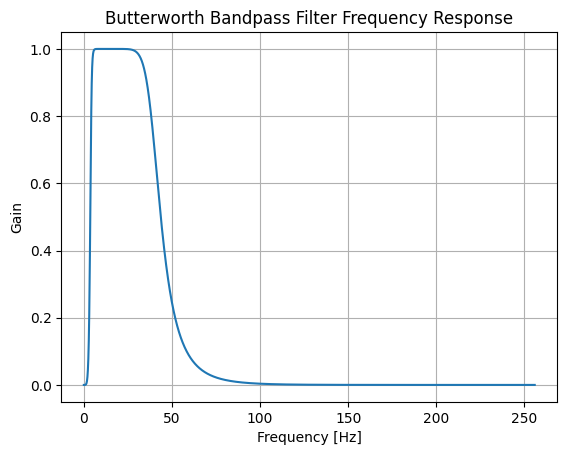

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Filter specifications
order = 5
fs = 512  # Sampling frequency in Hz
lowcut = 4  # Low cutoff frequency in Hz
highcut = 40  # High cutoff frequency in Hz

# Normalize the frequencies by the Nyquist frequency (fs/2)
nyquist = fs / 2
low = lowcut / nyquist
high = highcut / nyquist

# Design the Butterworth bandpass filter
b, a = signal.butter(order, [low, high], btype='band')

# Frequency response
w, h = signal.freqz(b, a, worN=2000)
frequencies = (w / np.pi) * nyquist

# Plot the frequency response
plt.figure()
plt.plot(frequencies, abs(h))
plt.title('Butterworth Bandpass Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.show()

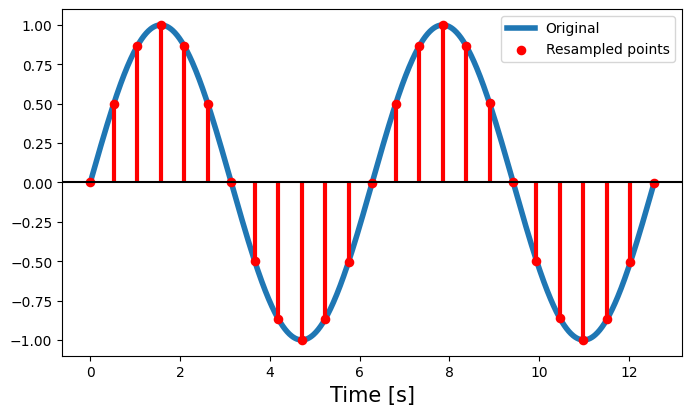

In [ ]:
x = np.linspace(0,6.28*2,1000)
x2 = np.linspace(0,6.28*2,25)

y = np.sin(x)
y2 = np.sin(x2)

fig = plt.figure(figsize=(8,4.5))

plt.plot(x,y, label='Original', linewidth=4, zorder=0)
plt.vlines(x2,0,y2, colors='red', linewidth=3, zorder=1)
plt.scatter(x2,y2, c='red', label='Resampled points', s=35, zorder=2)
plt.axhline(0,c='k')
plt.legend(loc='upper right')
#plt.axis('off')
plt.xlabel('Time [s]', size=15)
plt.show()

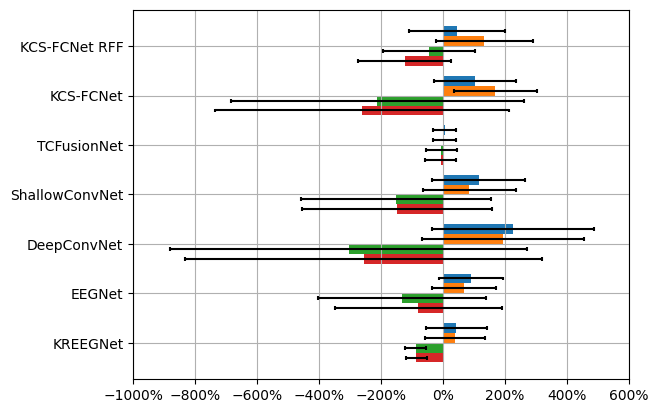

In [ ]:
models = df.columns.values[:-1]
xticks = np.arange(len(models))
width = 0.2

plt.grid(True)
for i, metric in enumerate([' Gain Class 0', ' Gain Class 1',' Drop Class 0', ' Drop Class 1']):
    try:
        percentages = np.array([x*100 for x in df.loc[f'Mean{metric}'].values])[:-1]
    except:
        percentages = np.array([x*100 for x in df.loc[f'Median{metric}'].values])[:-1]
    stds = np.array([x*100 for x in df.loc[f'Std{metric}'].values], )[:-1]
    padding = -(i-1.5)*width

    plt.barh(xticks+padding, (percentages), height = width)

    plt.hlines(xticks+padding, percentages-stds, percentages+stds, colors='black')
    plt.vlines(percentages-stds, xticks+padding-width*0.2, xticks+padding+width*0.2, colors= 'black')
    plt.vlines(percentages+stds, xticks+padding-width*0.2, xticks+padding+width*0.2, colors= 'black')

locs, labels = plt.xticks()
labels = [f'{x.get_text()}%' for x in labels]
plt.xticks(locs, labels)
plt.yticks(xticks, models, rotation=0, ha='right')
plt.show()

EEGNet Accuracy after Gain


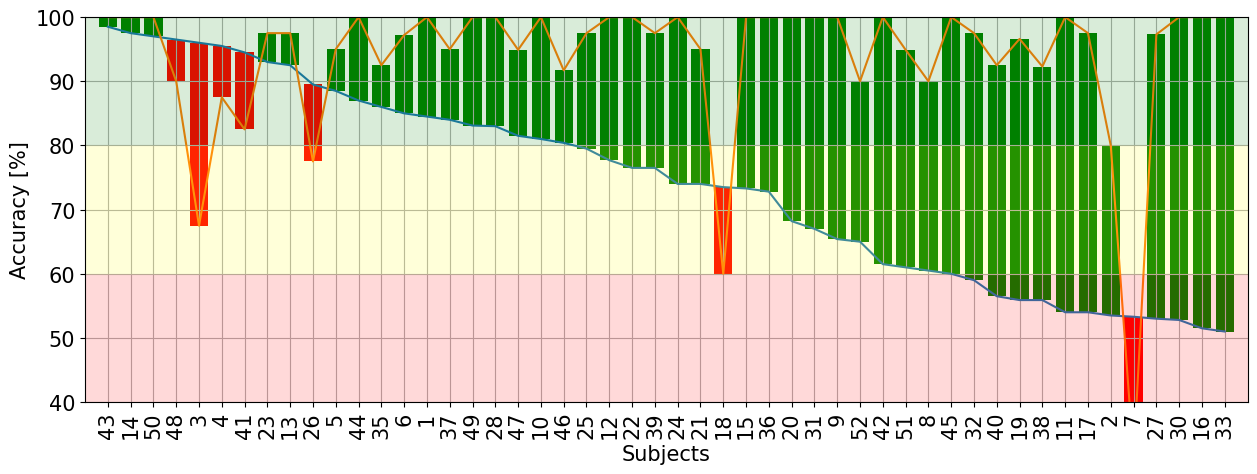

KCS-FCNet Accuracy after Gain


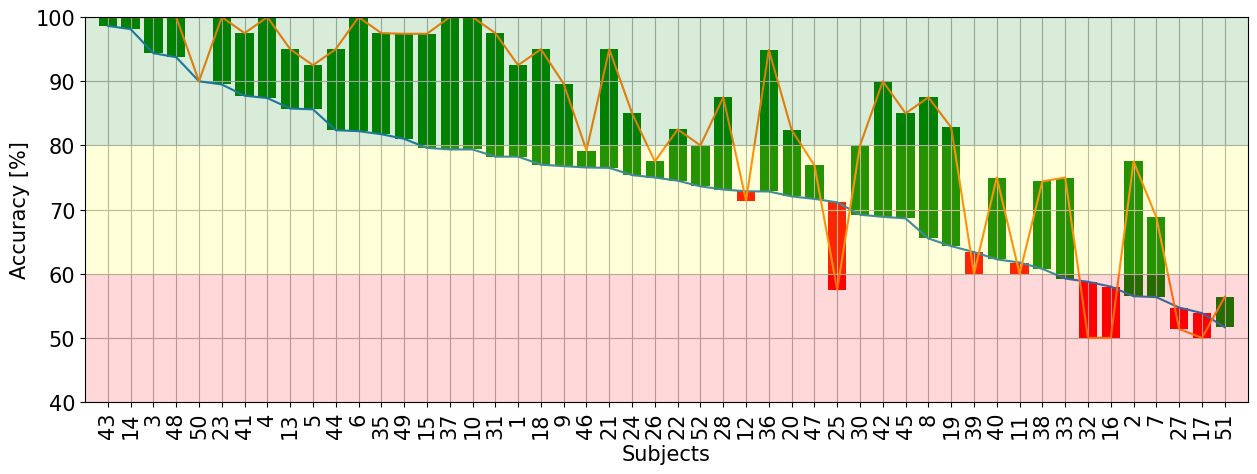

KREEGNet Accuracy after Gain


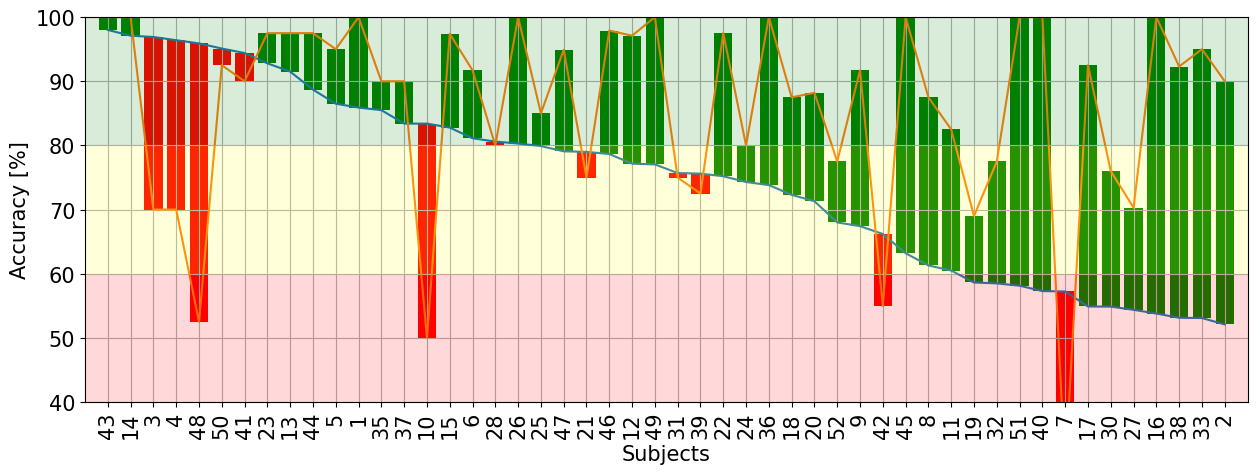

DeepConvNet Accuracy after Gain


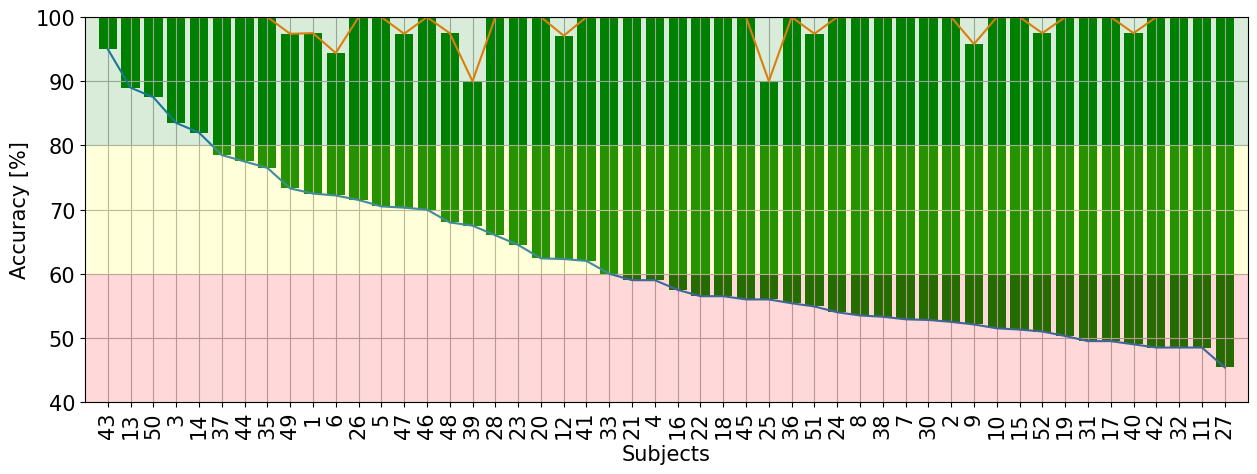

ShallowConvNet Accuracy after Gain


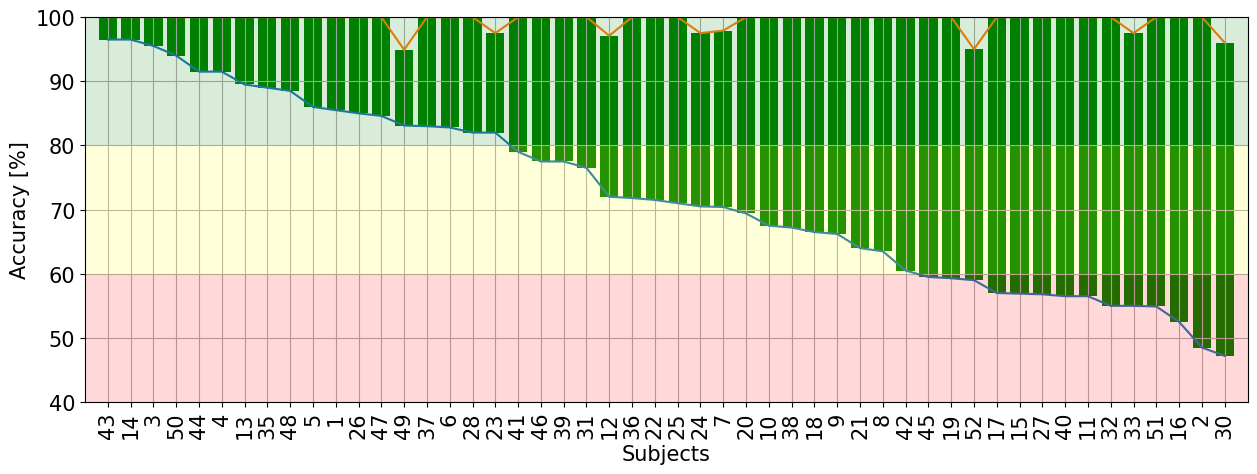

TCFusionNet Accuracy after Gain


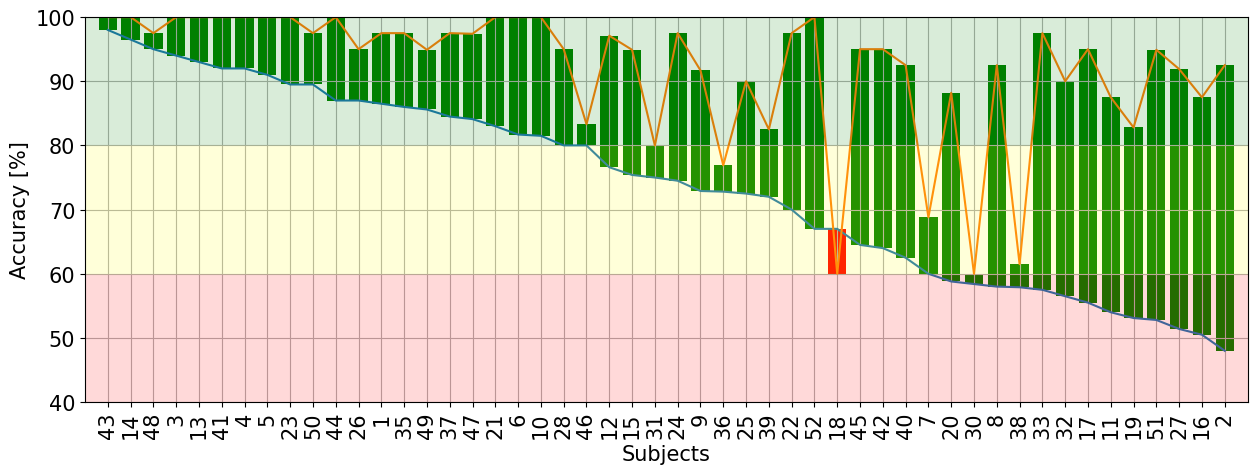

CSP Accuracy after Gain


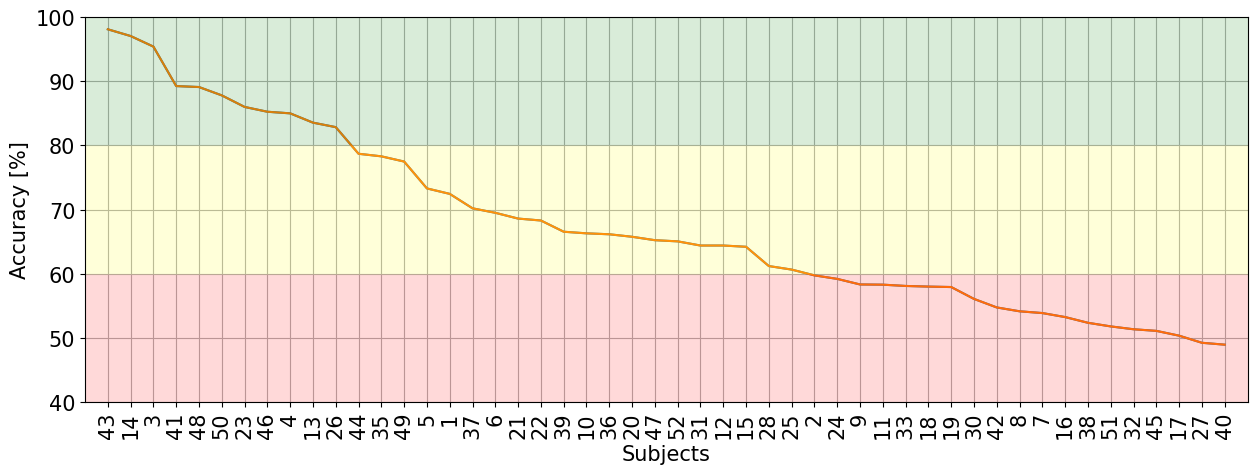

In [ ]:
subjects = np.arange(52)+1
subjects = np.delete(subjects,[28,33]) # delete 29 and 34
subjects_2 = np.arange(50)
width = 0.3
models_list = ['EEGNet', 'KCS-FCNet', 'KREEGNet', 'DeepConvNet', 'ShallowConvNet', 'TCFusionNet', 'CSP']
model_accuracies_before = np.zeros((len(models_list), 50))
model_accuracies_after = np.zeros((len(models_list), 50))

for i, model in enumerate(models_list):
        df_model = pd.read_excel('/content/EEG State of the Art Results + CAMS.xlsx', index_col=0, sheet_name=model)
        accuracies_before = df_model['Mean Accuracy'].values[:50]
        if model != 'CSP':
            accuracies_after = df_model['Mean Accuracy After'].values[:50]
        else:
            accuracies_after = accuracies_before
        model_accuracies_before[i] = accuracies_before
        model_accuracies_after[i] = accuracies_after

        accuracies_before, accuracies_after, subjects_sorted = multi_sort(accuracies_before, accuracies_after, subjects, reverse=True)
        diffs = np.array(accuracies_after) - np.array(accuracies_before)
        colors = [['red', 'green'][int(x)] for x in diffs>=0]

        fig =plt.figure(figsize=(15,5))
        plt.plot(subjects_2, accuracies_before)
        plt.plot(subjects_2, accuracies_after)
        plt.bar(subjects_2, diffs, bottom=accuracies_before, color=colors)

        plt.xticks(subjects_2, subjects_sorted, size=15, rotation=90)
        plt.vlines(25, 0.0, 0.6, alpha = 0.15, linewidth = 1500, color = 'red') # Color the red region for accuracies below 0.6
        plt.vlines(25, 0.6, 0.8, alpha = 0.15, linewidth = 1500, color = 'yellow') # Color the yellow region for accuracies between 0.8 and 0.6
        plt.vlines(25, 0.8, 1.0, alpha = 0.15, linewidth = 1500, color = 'green') # Color the green region for accuracies above 0.8

        print(f'{model} Accuracy after Gain')
        plt.xlabel('Subjects', size=15)
        plt.ylabel('Accuracy [%]', size=15)
        plt.grid(True)
        plt.ylim(0.4,1)
        t, l = plt.yticks()
        plt.yticks(t,[f'{x*100:0.0f}' for x in t], size=15)
        plt.xlim(-1, 50)
        plt.savefig(f'{model}_gains.pdf', bbox_inches='tight')
        plt.show()


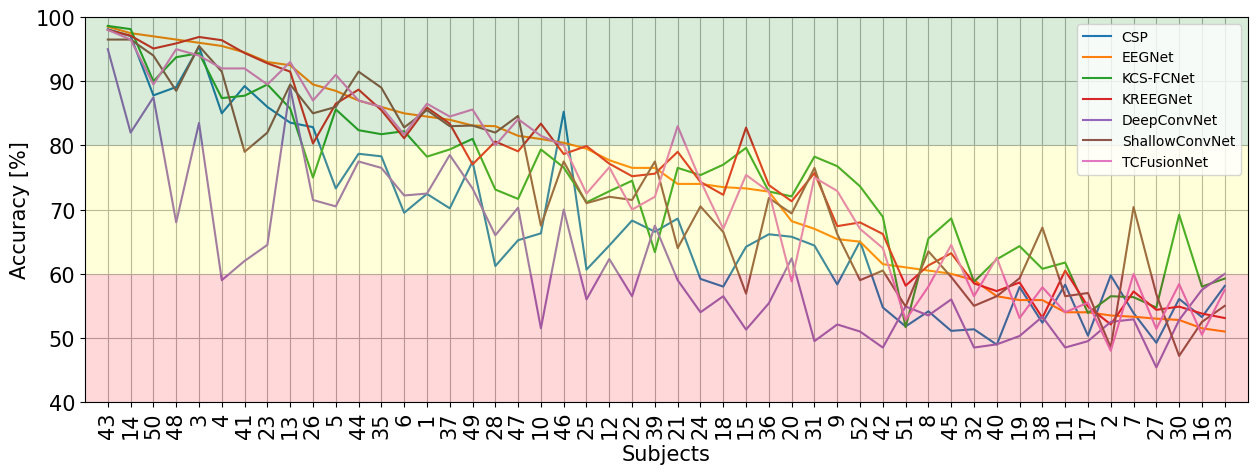

In [ ]:
info_sorted = multi_sort(*tuple(model_accuracies_before), subjects, reverse=True)
subjects_sorted = info_sorted[-1]

fig =plt.figure(figsize=(15,5))
plt.plot(subjects_2, info_sorted[-2], label='CSP')
for i, model in zip(info_sorted[:-1], models_list):
    if model != 'CSP':
        plt.plot(subjects_2, i, label=model)

plt.xticks(subjects_2, subjects_sorted, size=15, rotation=90)
plt.vlines(25, 0.0, 0.6, alpha = 0.15, linewidth = 1500, color = 'red') # Color the red region for accuracies below 0.6
plt.vlines(25, 0.6, 0.8, alpha = 0.15, linewidth = 1500, color = 'yellow') # Color the yellow region for accuracies between 0.8 and 0.6
plt.vlines(25, 0.8, 1.0, alpha = 0.15, linewidth = 1500, color = 'green') # Color the green region for accuracies above 0.8

#print(f'{model} Accuracy after Gain')
plt.xlabel('Subjects', size=15)
plt.ylabel('Accuracy [%]', size=15)
plt.legend()
plt.grid(True)
plt.ylim(0.4,1)
t, l = plt.yticks()
plt.yticks(t,[f'{x*100:0.0f}' for x in t], size=15)
plt.xlim(-1, 50)
plt.savefig(f'Model Performances.pdf', bbox_inches='tight')
plt.show()

In [ ]:
from scipy.stats import friedmanchisquare
before_gain = friedmanchisquare(*[model_accuracies_before[x,:] for x in range(7)])
after_gain = friedmanchisquare(*[model_accuracies_after[x,:] for x in range(6)])

before_gain.pvalue, after_gain.pvalue

(6.755486386709786e-22, 1.9788188252866863e-20)

Before


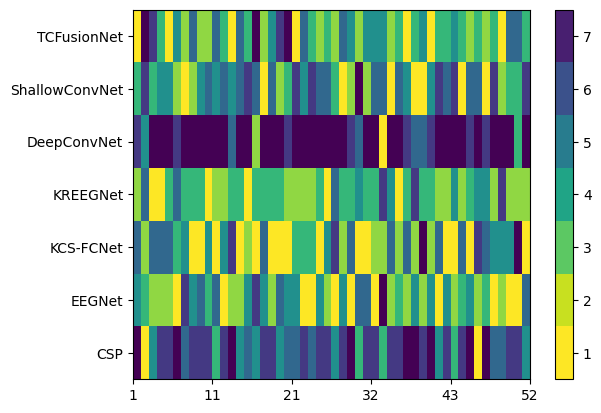

After


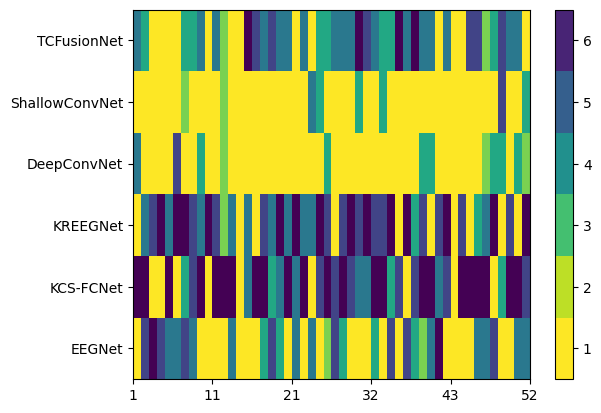

In [ ]:
ranking_array_before = np.zeros((7,50))

new_model_list = np.insert(models_list[:-1], 0, models_list[-1])

for i in range(50):
    accuracies = sorted(model_accuracies_before[:,i], reverse=True)
    j=0
    step = 1
    while j<7:
        ref_acc = accuracies[j]
        model_values = model_accuracies_before[:,i] <= ref_acc
        ranking_array_before[:,i] += model_values*step
        step = np.sum(model_accuracies_before[:,i] == ref_acc)
        j += step

ranking_array_after = np.zeros((6,50))
for i in range(50):
    accuracies = sorted(model_accuracies_after[:-1,i], reverse=True)
    j=0
    step = 1
    while j<6:
        ref_acc = accuracies[j]
        model_values = model_accuracies_after[:-1,i] <= ref_acc
        ranking_array_after[:,i] += model_values*step
        step = np.sum(model_accuracies_after[:-1,i] == ref_acc)
        j += step

#Reorder
ranking_array_before = np.insert(ranking_array_before[:-1], 0, ranking_array_before[-1], axis=0)

print('Before')
plt.pcolormesh(ranking_array_before, cmap='viridis_r')
plt.yticks(np.arange(0.5,7.5), new_model_list)
plt.xticks(np.arange(0,51,10),
            [int(subjects[x]) for x in range(0,50,10)]+[int(subjects[-1])])
cbar = plt.colorbar(boundaries=np.arange(8))
cbar.set_ticks(np.arange(1,8)-0.5)
cbar.set_ticklabels(np.arange(1,8))
plt.show()

print('After')
plt.pcolormesh(ranking_array_after, cmap='viridis_r')
plt.yticks(np.arange(0.5,6.5), models_list[:-1])
plt.xticks(np.arange(0,51,10),
            [int(subjects[x]) for x in range(0,50,10)]+[int(subjects[-1])])
cbar = plt.colorbar(boundaries=np.arange(7))
cbar.set_ticks(np.arange(1,7)-0.5)
cbar.set_ticklabels(np.arange(1,7))
plt.show()

Before


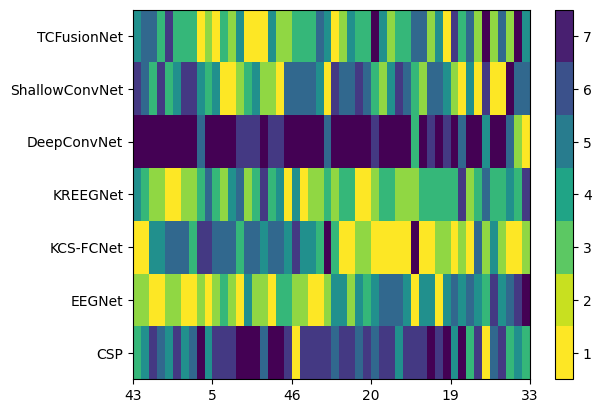

After


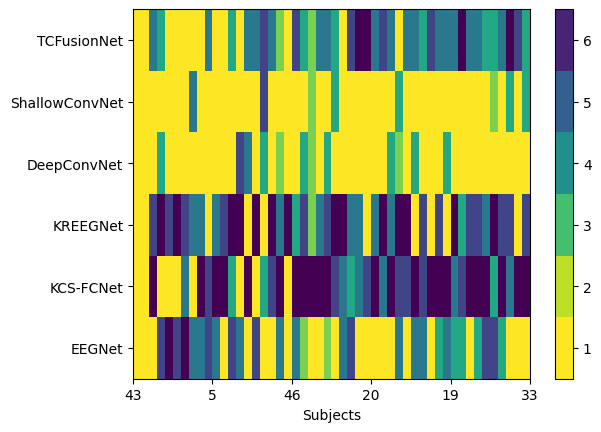

In [ ]:
info_sorted_after = np.array(multi_sort(model_accuracies_before[0],*tuple(model_accuracies_after[:-1]), subjects, reverse=True))
_, info_sorted_after, subjects_sorted_after = info_sorted_after[0], info_sorted_after[1:-1], info_sorted_after[-1]

ranking_array_before = np.zeros((7,50))
for i in range(50):
    accuracies = sorted(np.array(info_sorted[:-1])[:,i], reverse=True)
    j=0
    step = 1
    while j<7:
        ref_acc = accuracies[j]
        model_values = np.array(info_sorted[:-1])[:,i] <= ref_acc
        ranking_array_before[:,i] += model_values*step
        step = np.sum(np.array(info_sorted[:-1])[:,i] == ref_acc)
        j += step

ranking_array_after = np.zeros((6, 50))
for i in range(50):
    accuracies = sorted(info_sorted_after[:, i], reverse=True)
    j=0
    step = 1
    while j<6:
        ref_acc = accuracies[j]
        model_values = info_sorted_after[:, i] <= ref_acc
        ranking_array_after[:,i] += model_values*step
        step = np.sum(info_sorted_after[:, i] == ref_acc)
        j += step

#Reorder
ranking_array_before = np.insert(ranking_array_before[:-1], 0, ranking_array_before[-1], axis=0)

print('Before')
plt.pcolormesh(ranking_array_before, cmap='viridis_r')
plt.yticks(np.arange(0.5,7.5), new_model_list)
plt.xticks(np.arange(0,51,10),
            [int(subjects_sorted_after[x]) for x in range(0,50,10)]+[int(subjects_sorted_after[-1])])
cbar = plt.colorbar(boundaries=np.arange(8))
cbar.set_ticks(np.arange(1,8)-0.5)
cbar.set_ticklabels(np.arange(1,8))
plt.savefig('Rankings_Before.pdf', bbox_inches='tight')
plt.show()

print('After')
plt.pcolormesh(ranking_array_after, cmap='viridis_r')
plt.yticks(np.arange(0.5,6.5), models_list[:-1])
plt.xticks(np.arange(0,51,10),
            [int(subjects_sorted_after[x]) for x in range(0,50,10)]+[int(subjects_sorted_after[-1])])
plt.xlabel('Subjects', )
cbar = plt.colorbar(boundaries=np.arange(7))
cbar.set_ticks(np.arange(1,7)-0.5)
cbar.set_ticklabels(np.arange(1,7))
plt.savefig('Rankings_After.pdf', bbox_inches='tight')
plt.show()

In [ ]:
avg_ranking_before = np.mean(ranking_array_before, axis=1)
avg_ranking_after = np.mean(ranking_array_after, axis=1)

for model, avg_ranking in zip(new_model_list, avg_ranking_before):
    print(f'{model}: {avg_ranking}')
print('-'*10)
for model, avg_ranking in zip(new_model_list[1:], avg_ranking_after):
    print(f'{model}: {avg_ranking}')

CSP: 5.32
EEGNet: 2.98
KCS-FCNet: 3.16
KREEGNet: 2.88
DeepConvNet: 6.32
ShallowConvNet: 3.8
TCFusionNet: 3.32
----------
EEGNet: 2.74
KCS-FCNet: 4.46
KREEGNet: 4.14
DeepConvNet: 1.48
ShallowConvNet: 1.34
TCFusionNet: 3.26


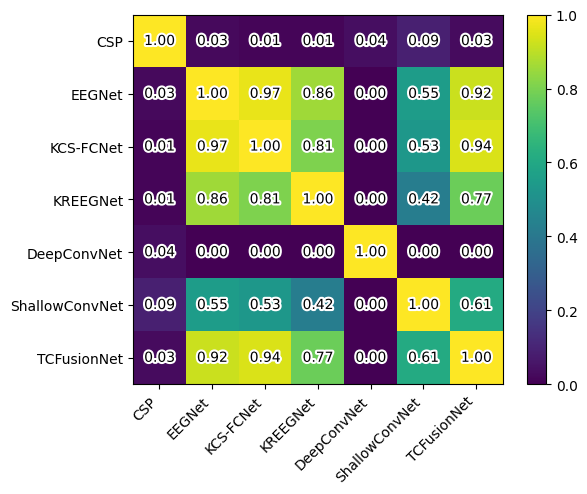

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.patheffects as pe

t_test_array = np.zeros((7,7))
for i in range(7):
    for j in range(i,7):
        ttest_results = ttest_ind(model_accuracies_before[i], model_accuracies_before[j], equal_var=False, random_state=42)
        t_test_array[i,j] = ttest_results.pvalue
        t_test_array[j,i] = t_test_array[i,j]

#Reorder
t_test_array = np.insert(t_test_array[:-1], 0, t_test_array[-1], axis=0)
t_test_array = np.insert(t_test_array[:,:-1], 0, t_test_array[:,-1], axis=1)

plt.imshow(t_test_array, vmin=0.0, vmax=1.0)
plt.yticks(np.arange(7), new_model_list)
plt.xticks(np.arange(7), new_model_list, rotation=45, ha='right')
plt.colorbar()

for i in range(7):
    for j in range(7):
        plt.text(i,j,f'{t_test_array[i,j]:0.2f}', ha='center', va='center',
                 path_effects=[pe.withStroke(linewidth=3, foreground="white")])
plt.savefig('Ttest_Before.pdf', bbox_inches='tight')
plt.show()

In [ ]:
for model, avg_ranking, i in zip(new_model_list, avg_ranking_before, range(7)):
    print(f'{model} & ${avg_ranking:0.2f}$ & ${np.mean(t_test_array[i, np.delete(np.arange(7),i)]):0.2f}$\\\\')

CSP & $5.32$ & $0.03$\\
EEGNet & $2.98$ & $0.55$\\
KCS-FCNet & $3.16$ & $0.54$\\
KREEGNet & $2.88$ & $0.48$\\
DeepConvNet & $6.32$ & $0.01$\\
ShallowConvNet & $3.80$ & $0.37$\\
TCFusionNet & $3.32$ & $0.55$\\


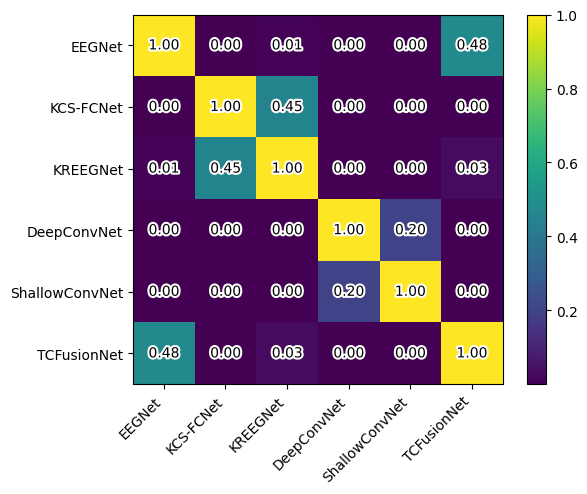

In [ ]:
t_test_array = np.zeros((7,7))
for i in range(7):
    for j in range(i,7):
        ttest_results = ttest_ind(model_accuracies_after[i], model_accuracies_after[j], equal_var=False, random_state=42)
        t_test_array[i,j] = ttest_results.pvalue
        t_test_array[j,i] = t_test_array[i,j]

#Reorder
t_test_array = np.insert(t_test_array[:-1], 0, t_test_array[-1], axis=0)
t_test_array = np.insert(t_test_array[:,:-1], 0, t_test_array[:,-1], axis=1)

plt.imshow(t_test_array[1:,1:])
plt.yticks(np.arange(6), new_model_list[1:])
plt.xticks(np.arange(6), new_model_list[1:], rotation=45, ha='right')
plt.colorbar()

for i in range(6):
    for j in range(6):
        plt.text(i,j,f'{t_test_array[i+1,j+1]:0.2f}', ha='center', va='center',
                 path_effects=[pe.withStroke(linewidth=3, foreground="white")])
plt.savefig('Ttest_After.pdf', bbox_inches='tight')
plt.show()

In [ ]:
for model, avg_ranking, i in zip(new_model_list[1:], avg_ranking_after, range(6)):
    print(f'{model} & ${avg_ranking:0.2f}$ & ${np.mean(t_test_array[i, np.delete(np.arange(6),i)]):0.2e}$\\\\')

EEGNet & $2.74$ & $1.00e-07$\\
KCS-FCNet & $4.46$ & $2.67e-03$\\
KREEGNet & $4.14$ & $9.06e-02$\\
DeepConvNet & $1.48$ & $9.21e-02$\\
ShallowConvNet & $1.34$ & $4.08e-02$\\
TCFusionNet & $3.26$ & $4.04e-02$\\


In [ ]:
good_groups = []
mid_groups = []
bad_groups = []

EEGNet_array = np.array(info_sorted[0])
for model_info in info_sorted[:-1]:
    model_info_array = np.array(model_info)
    list_good = model_info_array[np.where(EEGNet_array>=0.8)[0]]
    list_mid = model_info_array[np.where((EEGNet_array>=0.6)*(EEGNet_array<0.8))[0]]
    list_bad = model_info_array[np.where(EEGNet_array<0.6)[0]]
    good_groups += [list_good*100]
    mid_groups += [list_mid*100]
    bad_groups += [list_bad*100]

In [ ]:
print(np.where(model_accuracies_before[0]>=0.8)[0])
print(np.where((model_accuracies_before[0]>=0.6)*(model_accuracies_before[0]<0.8))[0])
print(np.where(model_accuracies_before[0]<0.6)[0])

[ 0  2  3  4  5  9 12 13 22 25 27 32 34 38 40 41 43 44 45 46 47]
[ 7  8 11 14 17 19 20 21 23 24 29 33 36 39 42 48 49]
[ 1  6 10 15 16 18 26 28 30 31 35 37]


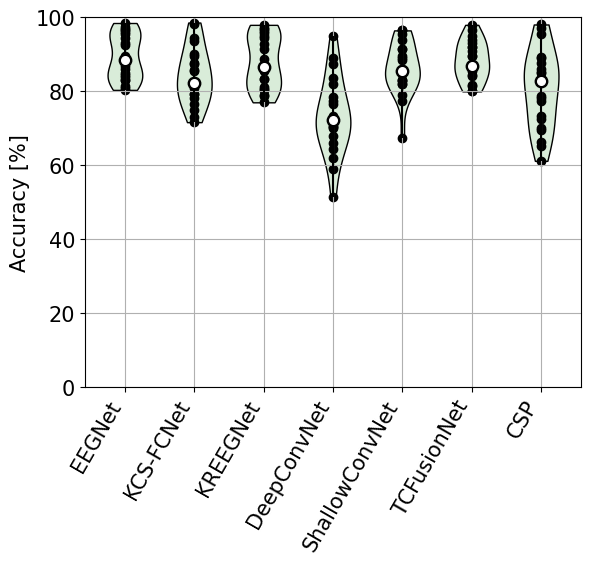

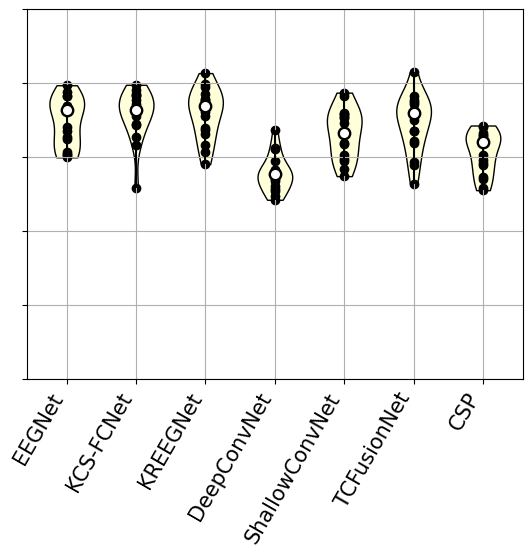

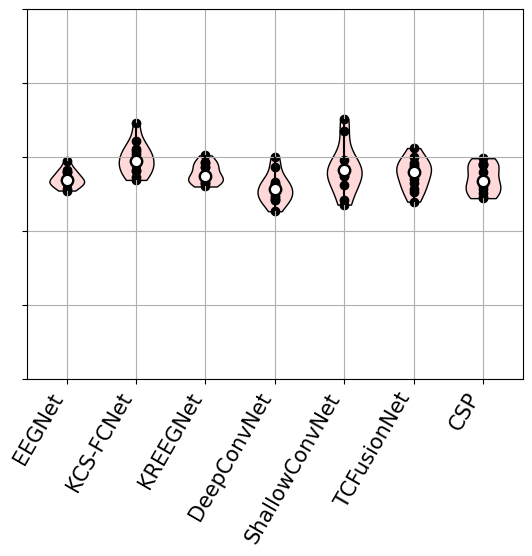

In [ ]:
positions = np.arange(1,8,1)
flag = 1
for list_set, color in zip([good_groups, mid_groups, bad_groups], ['#d9ecd9', '#ffffd9', '#ffd8d9']):
    fig = plt.figure()
    ax = plt.axes()
    #list_set = list(list_set.T)

    violins = plt.violinplot(list_set, positions = positions, showextrema=False,)
    for i, list_values in enumerate(list_set):
        min_val = np.min(list_values)
        max_val = np.max(list_values)
        plt.vlines([i+1], min_val, max_val, color='black')

        median = np.median (list_values)
        plt.scatter([i+1]*len(list_values), list_values, c='black')
        plt.scatter([i+1], median, c='black', zorder=2, s=80)
        plt.scatter([i+1], median, c='white', zorder=3, s=30)

    for violin in violins['bodies']:
        violin.set_facecolor(color)
        violin.set_edgecolor('black')
        violin.set_alpha(1)
    #ax.set_facecolor(color)
    plt.ylim(0, 100)
    if flag:
        plt.ylabel('Accuracy [%]', size=15)
        ticks_pos = plt.yticks()[0]
        flag = 0
    else:
        plt.yticks(ticks_pos, ['']*len(ticks_pos))
    plt.grid()

    plt.yticks(size=15)
    plt.xticks(positions, models_list, rotation=60, ha='right', size=15)
    plt.show()

In [ ]:
with open('/content/InterModel_MetricData.npy', 'rb') as f:
    metric_data = np.load(f)

In [ ]:
g1 = [0, 2, 3, 4, 5, 9, 12, 13, 22, 25, 27, 32, 34, 38, 40, 41, 43, 44, 45, 46, 47]
g2 = [7, 8, 11, 14, 17, 19, 20, 21, 23, 24, 29, 33, 36, 39, 42, 48, 49]
g3 = [1, 6, 10, 15, 16, 18, 26, 28, 30, 31, 35, 37]
models_list = ['EEGNet', 'KREEGNet', 'KCS-FCNet', 'DeepConvNet', 'ShallowConvNet', 'TCNet_fusion']

good_groups = metric_data[g1][:,[x*6 for x in range(6)]]*100
mid_groups = metric_data[g2][:,[x*6 for x in range(6)]]*100
bad_groups = metric_data[g3][:,[x*6 for x in range(6)]]*100

good_groups_after = metric_data[g1][:,[x*6 + 3 for x in range(6)]]*100
mid_groups_after = metric_data[g2][:,[x*6 + 3 for x in range(6)]]*100
bad_groups_after = metric_data[g3][:,[x*6 + 3 for x in range(6)]]*100

In [ ]:
for before, after, group in zip([good_groups, mid_groups, bad_groups], [good_groups_after, mid_groups_after, bad_groups_after], ['G1', 'G2', 'G3']):
    diff = after - before
    med, std = np.mean(diff, axis=0), np.std(diff,axis=0)
    for i, model_ in enumerate(models_list):
        print(f'{model_} & {group}: & ${np.mean(before[:,i]):0.2f}\% \pm {np.std(before[:,i]):0.2f}\%$ & ${np.mean(after[:,i]):0.2f}\% \pm {np.std(after[:,i]):0.2f}\%$ & ${med[i]:0.2f}\% \pm {std[i]:0.2f}\%$\\\\')

EEGNet & G1: & $98.10\% \pm 2.68\%$ & $93.41\% \pm 7.43\%$ & $-4.69\% \pm 7.57\%$\\
KREEGNet & G1: & $91.87\% \pm 6.89\%$ & $85.24\% \pm 9.83\%$ & $-6.63\% \pm 8.76\%$\\
KCS-FCNet & G1: & $84.89\% \pm 9.74\%$ & $83.91\% \pm 10.49\%$ & $-0.98\% \pm 4.02\%$\\
DeepConvNet & G1: & $90.97\% \pm 11.78\%$ & $90.14\% \pm 13.13\%$ & $-0.83\% \pm 5.42\%$\\
ShallowConvNet & G1: & $98.46\% \pm 2.74\%$ & $96.31\% \pm 6.07\%$ & $-2.15\% \pm 4.18\%$\\
TCNet_fusion & G1: & $98.01\% \pm 3.91\%$ & $97.91\% \pm 4.15\%$ & $-0.10\% \pm 1.78\%$\\
EEGNet & G2: & $93.98\% \pm 8.45\%$ & $87.09\% \pm 12.42\%$ & $-6.89\% \pm 10.28\%$\\
KREEGNet & G2: & $77.37\% \pm 6.41\%$ & $67.64\% \pm 9.14\%$ & $-9.73\% \pm 8.62\%$\\
KCS-FCNet & G2: & $71.42\% \pm 10.88\%$ & $69.31\% \pm 11.26\%$ & $-2.10\% \pm 4.47\%$\\
DeepConvNet & G2: & $87.40\% \pm 11.58\%$ & $86.37\% \pm 13.26\%$ & $-1.03\% \pm 2.87\%$\\
ShallowConvNet & G2: & $93.05\% \pm 7.62\%$ & $93.04\% \pm 7.53\%$ & $-0.00\% \pm 1.49\%$\\
TCNet_fusion & G2: & $91.

(array([-60., -40., -20.,   0.,  20.,  40.,  60.]), [Text(0, -60.0, '−60'), Text(0, -40.0, '−40'), Text(0, -20.0, '−20'), Text(0, 0.0, '0'), Text(0, 20.0, '20'), Text(0, 40.0, '40'), Text(0, 60.0, '60')])


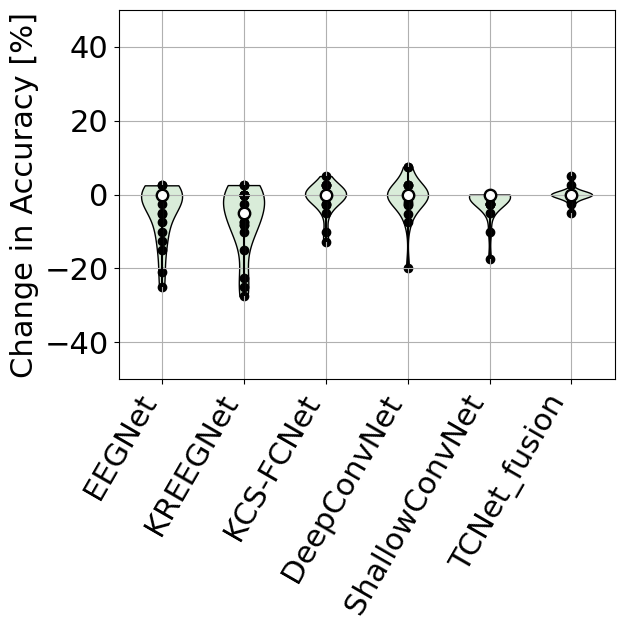

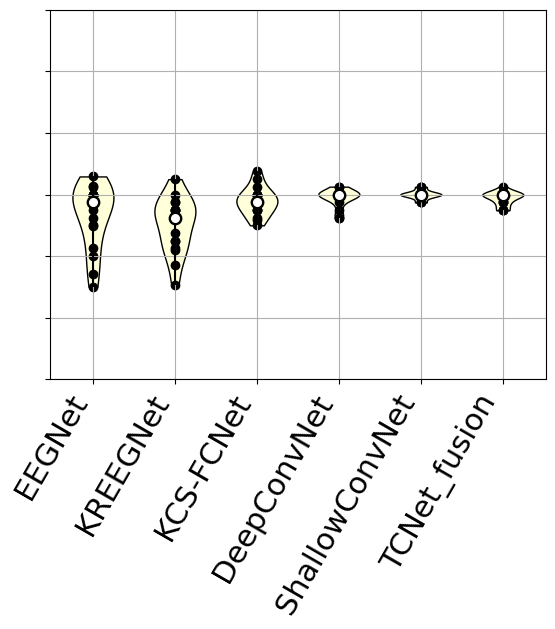

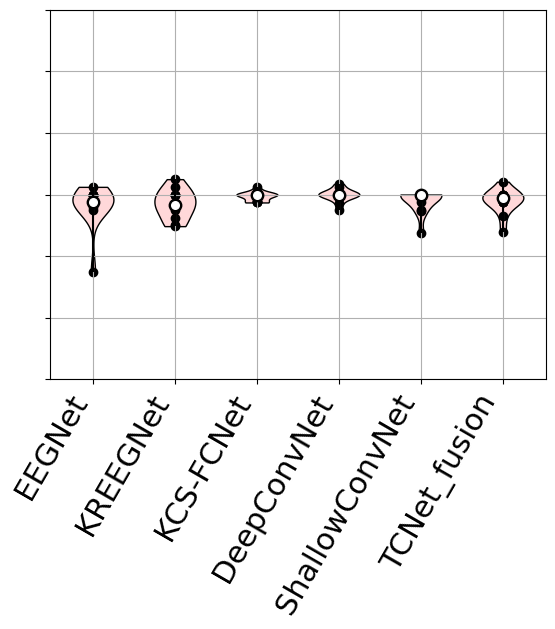

In [ ]:
positions = np.arange(1,7,1)
flag = 1
for before, after, color in zip([good_groups, mid_groups, bad_groups], [good_groups_after, mid_groups_after, bad_groups_after], ['#d9ecd9', '#ffffd9', '#ffd8d9']):
    fig = plt.figure()
    ax = plt.axes()
    diff = after - before
    list_set = list(diff.T)

    violins = plt.violinplot(list_set, positions = positions, showextrema=False,)
    for i, list_values in enumerate(list_set):
        min_val = np.min(list_values)
        max_val = np.max(list_values)
        plt.vlines([i+1], min_val, max_val, color='black')

        median = np.median (list_values)
        plt.scatter([i+1]*len(list_values), list_values, c='black')
        plt.scatter([i+1], median, c='black', zorder=2, s=80)
        plt.scatter([i+1], median, c='white', zorder=3, s=30)

    for violin in violins['bodies']:
        violin.set_facecolor(color)
        violin.set_edgecolor('black')
        violin.set_alpha(1)
    #ax.set_facecolor(color)
    plt.ylim(-50, 50)
    if flag:
        plt.ylabel('Change in Accuracy [%]', size=22)
        ticks_pos = plt.yticks()[0]
        print(plt.yticks())
        flag = 0
    else:
        plt.yticks(ticks_pos, ['']*len(ticks_pos))
    plt.grid()

    plt.yticks(size=22)
    plt.xticks(positions, models_list, rotation=60, ha='right', size=22)
    plt.show()

In [ ]:
diff.shape

(12, 6)

In [ ]:
positions = np.arange(1,7,1)
flag = 1
for list_set, color in zip([good_groups_after, mid_groups_after, bad_groups_after], ['#d9ecd9', '#ffffd9', '#ffd8d9']):
    fig = plt.figure()
    ax = plt.axes()
    list_set = list(list_set.T)

    violins = plt.violinplot(list_set, positions = positions, showextrema=False,)
    for i, list_values in enumerate(list_set):
        min_val = np.min(list_values)
        max_val = np.max(list_values)
        plt.vlines([i+1], min_val, max_val, color='black')

        median = np.median (list_values)
        plt.scatter([i+1]*len(list_values), list_values, c='black')
        plt.scatter([i+1], median, c='black', zorder=2, s=80)
        plt.scatter([i+1], median, c='white', zorder=3, s=30)

    for violin in violins['bodies']:
        violin.set_facecolor(color)
        violin.set_edgecolor('black')
        violin.set_alpha(1)
    #ax.set_facecolor(color)
    plt.ylim(0, 100)
    if flag:
        plt.ylabel('Accuracy [%]', size=15)
        ticks_pos = plt.yticks()[0]
        flag = 0
    else:
        plt.yticks(ticks_pos, ['']*len(ticks_pos))
    plt.grid()

    plt.yticks(size=15)
    plt.xticks(positions, models_list, rotation=60, ha='right', size=15)
    plt.show()

NameError: name 'good_groups_after' is not defined

In [ ]:
acc_after = (metric_data[:,[x*6 + 3 + 2 for x in range(6)]]*1).T
acc_before = (metric_data[:,[x*6 + 2 for x in range(6)]]*1).T
print('Model & Before & After & Difference\\\\', end='\n\\hline\n')
for model, before, after in zip(models_list, acc_before, acc_after):
    diff = after - before
    print(f'{model} & ${np.mean(before):0.2f} \pm {np.std(before):0.2f}$ & ${np.mean(after):0.2f} \pm {np.std(after):0.2}$ & ${np.mean(diff):0.2f} \pm {np.std(diff):0.2f}$\\\\')

Model & Before & After & Difference\\
\hline
EEGNet & $0.79 \pm 0.16$ & $0.93 \pm 0.14$ & $0.14 \pm 0.21$\\
KREEGNet & $0.81 \pm 0.15$ & $0.82 \pm 0.21$ & $0.01 \pm 0.25$\\
KCS-FCNet & $0.81 \pm 0.13$ & $0.75 \pm 0.2$ & $-0.05 \pm 0.16$\\
DeepConvNet & $0.66 \pm 0.15$ & $0.95 \pm 0.19$ & $0.29 \pm 0.23$\\
ShallowConvNet & $0.78 \pm 0.15$ & $0.99 \pm 0.013$ & $0.22 \pm 0.15$\\
TCNet_fusion & $0.80 \pm 0.16$ & $0.92 \pm 0.1$ & $0.12 \pm 0.14$\\


In [ ]:
acc_after[0] - acc_before[0]

array([ 10.00000238,  12.5       , -32.49999881, -12.5       ,
        -2.50000358,  -2.7777791 ,   4.16666865, -50.00000149,
         0.        ,   2.49999762,   7.49999881,   2.85714269,
        -2.49999762,   0.        ,   0.        ,   7.49999881,
         2.50000358, -34.99999642,   3.44827175,  11.76470518,
         0.        ,   2.49999762,   0.        ,   2.49999762,
         0.        , -22.50000238,   0.        ,   5.00000119,
         0.        ,   2.49999762,   5.00000119,   7.49999881,
        -7.49999881,   5.12820482,  -5.00000119,   5.12820482,
        -2.49999762,  -5.00000119, -15.00000358,   2.49999762,
         0.        ,   2.49999762,   2.49999762,  -6.25      ,
        -2.56410241, -10.00000238,   7.69230723,   0.        ,
        -2.56410241,  12.5       ])

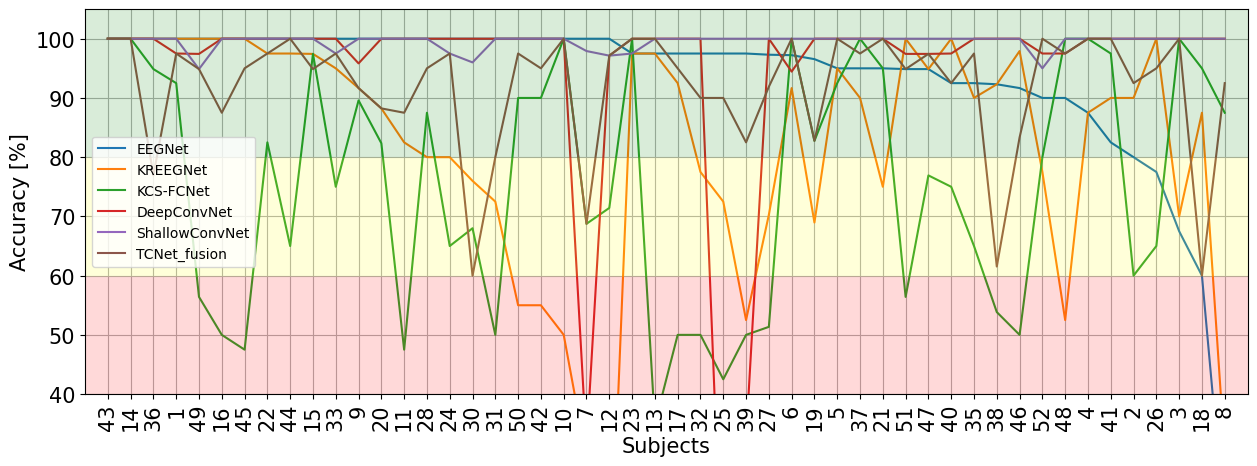

In [ ]:
info_sorted = multi_sort(*tuple(acc_after), subjects, reverse=True)
subjects_sorted = info_sorted[-1]

fig =plt.figure(figsize=(15,5))
for i, model in zip(info_sorted[:-1], models_list):
    plt.plot(subjects_2, i, label=model)

plt.xticks(subjects_2, subjects_sorted, size=15, rotation=90)
plt.vlines(25, 0.0, 60, alpha = 0.15, linewidth = 1500, color = 'red') # Color the red region for accuracies below 0.6
plt.vlines(25, 60, 80, alpha = 0.15, linewidth = 1500, color = 'yellow') # Color the yellow region for accuracies between 0.8 and 0.6
plt.vlines(25, 80, 120, alpha = 0.15, linewidth = 1500, color = 'green') # Color the green region for accuracies above 0.8

plt.xlabel('Subjects', size=15)
plt.ylabel('Accuracy [%]', size=15)
plt.legend()
plt.grid(True)
plt.ylim(40,105)
#, l = plt.yticks()
plt.yticks(size=15)
plt.xlim(-1, 50)
plt.savefig(f'Model Performances.pdf', bbox_inches='tight')
plt.show()

In [ ]:
xticks = np.arange(len(models_list))
width = 0.2

plt.grid(True)
for i, metric in enumerate([' acc', ' kappa', ' auc']):
    percentages = np.array([x*100 for x in df.loc[f'Mean{metric}'].values])[:-1]
    stds = np.array([x*100 for x in df.loc[f'Std{metric}'].values], )[:-1]

    percentages[0], percentages[1], percentages[2], percentages[3], percentages[4], percentages[5] = (percentages[4], percentages[3],
                                                                                                      percentages[2], percentages[0],
                                                                                                       percentages[5], percentages[1])
    stds[0], stds[1], stds[2], stds[3], stds[4], stds[5] = (stds[4], stds[3],
                                                            stds[2], stds[0],
                                                            stds[5], stds[1])

    padding = (-i+1.5)*width

    plt.barh(xticks+padding, percentages, height = width)

    plt.hlines(xticks+padding, percentages-stds, percentages+stds, colors='black')
    plt.vlines(percentages-stds, xticks+padding-width*0.2, xticks+padding+width*0.2, colors= 'black')
    plt.vlines(percentages+stds, xticks+padding-width*0.2, xticks+padding+width*0.2, colors= 'black')

plt.xlim(0,100)
locs, labels = plt.xticks()
labels = [f'{x.get_text()}' for x in labels]
plt.xticks(locs, labels, size=15)
plt.xlabel('Accuracy [%]', size=15)
plt.yticks(xticks, models, rotation=0, ha='right', size=15)
plt.savefig("Model Metrics.pdf", bbox_inches='tight')
plt.show()


In [ ]:
percentages_after = np.mean(model_accuracies_after[:], axis = 1)*100
stds_after = np.std(model_accuracies_after[:], axis = 1)*100

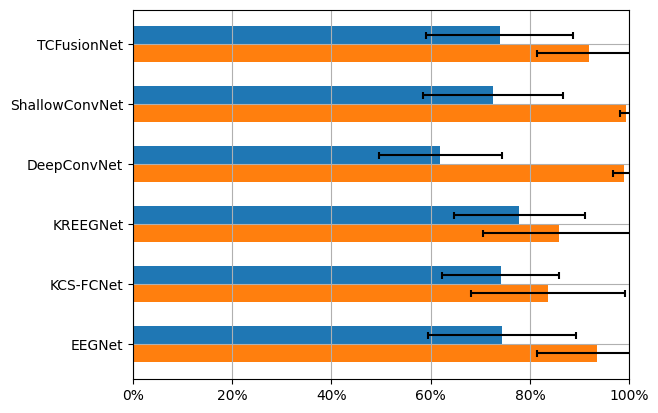

In [ ]:
models = df.columns.values[:-1][[1, 5, 0, 2, 3, 4]]
xticks = np.arange(len(models))
width = 0.3

percentages = np.array([x*100 for x in df.loc[f'Mean acc'].values])[:-1][[1, 5, 0, 2, 3, 4]]
stds = np.array([x*100 for x in df.loc[f'Std acc'].values], )[:-1][[1, 5, 0, 2, 3, 4]]
gain = np.array([x*100 for x in df.loc[f'Mean Gain'].values])[:-1][[1, 5, 0, 2, 3, 4]]
std_gain = np.array([x*100 for x in df.loc[f'Std Gain'].values])[:-1][[1, 5, 0, 2, 3, 4]]
padding = (0.5)*width

plt.grid(True)

plt.barh(xticks+padding, percentages, height = width)
plt.hlines(xticks+padding, percentages-stds, percentages+stds, colors='black')
plt.vlines(percentages-stds, xticks+padding-width*0.2, xticks+padding+width*0.2, colors= 'black')
plt.vlines(percentages+stds, xticks+padding-width*0.2, xticks+padding+width*0.2, colors= 'black')

padding = (-0.5)*width

plt.barh(xticks+padding, percentages_after, height = width)
plt.hlines(xticks+padding, percentages_after-stds_after, percentages_after+stds_after, colors='black')
plt.vlines(percentages_after-stds_after, xticks+padding-width*0.2, xticks+padding+width*0.2, colors= 'black')
plt.vlines(percentages_after+stds_after, xticks+padding-width*0.2, xticks+padding+width*0.2, colors= 'black')


plt.xlim(0,100)
locs, labels = plt.xticks()
labels = [f'{x.get_text()}%' for x in labels]
plt.xticks(locs, labels)
plt.yticks(xticks, models, rotation=0, ha='right')
plt.show()

In [ ]:
print(f'Model & Acc & Gain & Acc After\\\\')
for i in range(7-1):
    model_name = models[i]
    print(f'{model_name} & ${percentages[i]:0.1f}\% \pm {stds[i]:0.1f}\%$', end=' & ')
    print(f'${gain[i]:0.1f}\% \pm {std_gain[i]:0.1f}\%$',end=' & ')
    print(f'${percentages_after[i]:0.1f}\% \pm {stds_after[i]:0.1f}\%$ \\\\')

Model & Acc & Gain & Acc After\\
EEGNet & $74.4\% \pm 14.9\%$ & $78.5\% \pm 102.8\%$ & $93.5\% \pm 12.2\%$ \\
KCS-FCNet & $74.1\% \pm 11.8\%$ & $136.3\% \pm 132.7\%$ & $83.6\% \pm 15.5\%$ \\
KREEGNet & $77.9\% \pm 13.2\%$ & $40.5\% \pm 98.2\%$ & $86.0\% \pm 15.4\%$ \\
DeepConvNet & $61.9\% \pm 12.4\%$ & $210.0\% \pm 260.9\%$ & $99.0\% \pm 2.2\%$ \\
ShallowConvNet & $72.5\% \pm 14.1\%$ & $99.8\% \pm 150.0\%$ & $99.5\% \pm 1.3\%$ \\
TCFusionNet & $73.9\% \pm 14.8\%$ & $4.6\% \pm 36.9\%$ & $91.9\% \pm 10.4\%$ \\


In [ ]:
good_groups_idx = []
mid_groups_idx = []
bad_groups_idx = []

for model_info, model_info_after in zip(model_accuracies_before, model_accuracies_after):
    #model_info_array = np.array(model_info)
    list_good = np.where(model_info>=0.8)[0]
    list_mid = np.where((model_info>=0.6)*(model_info<0.8))[0]
    list_bad = np.where(model_info<0.6)[0]
    good_groups_idx += [list_good]
    mid_groups_idx += [list_mid]
    bad_groups_idx += [list_bad]

In [ ]:
print(f'Model & Group & Acc & Gain & Acc After\\\\')
print('\hline')
for i, model in enumerate(models_list):
        df_model = pd.read_excel('/content/EEG State of the Art Results + CAMS.xlsx', index_col=0, sheet_name=model)
        good_gains = df_model['Mean Gain'].values[:-2][good_groups_idx[i]]
        mid_gains = df_model['Mean Gain'].values[:-2][mid_groups_idx[i]]
        bad_gains = df_model['Mean Gain'].values[:-2][bad_groups_idx[i]]

        good_accs = df_model['Mean Accuracy'].values[:-2][good_groups_idx[i]]
        mid_accs = df_model['Mean Accuracy'].values[:-2][mid_groups_idx[i]]
        bad_accs = df_model['Mean Accuracy'].values[:-2][bad_groups_idx[i]]

        good_accs_after = df_model['Mean Accuracy After'].values[:-2][good_groups_idx[i]]
        mid_accs_after = df_model['Mean Accuracy After'].values[:-2][mid_groups_idx[i]]
        bad_accs_after = df_model['Mean Accuracy After'].values[:-2][bad_groups_idx[i]]


        mean_good_gains, std_good_gains = np.median(good_gains), np.std(good_gains)
        mean_mid_gains, std_mid_gains = np.median(mid_gains), np.std(mid_gains)
        mean_bad_gains, std_bad_gains = np.median(bad_gains), np.std(bad_gains)

        mean_good_accs, std_good_accs = np.mean(good_accs), np.std(good_accs)
        mean_mid_accs, std_mid_accs = np.mean(mid_accs), np.std(mid_accs)
        mean_bad_accs, std_bad_accs = np.mean(bad_accs), np.std(bad_accs)

        mean_good_accs_after, std_good_accs_after = np.mean(good_accs_after), np.std(good_accs_after)
        mean_mid_accs_after, std_mid_accs_after = np.mean(mid_accs_after), np.std(mid_accs_after)
        mean_bad_accs_after, std_bad_accs_after = np.mean(bad_accs_after), np.std(bad_accs_after)

        print(f' & GI & ${mean_good_accs*100:0.2f}\% \pm {std_good_accs*100:0.2f}\%$ & ${mean_good_gains*100:0.2f}\% \pm {std_good_gains*100:0.2f}\%$ & ${mean_good_accs_after*100:0.2f}\% \pm {std_good_accs_after*100:0.2f}\%$\\\\')
        print(f'{model} & GII & ${mean_mid_accs*100:0.2f}\% \pm {std_mid_accs*100:0.2f}\%$ & ${mean_mid_gains*100:0.2f}\% \pm {std_mid_gains*100:0.2f}\%$ & ${mean_mid_accs_after*100:0.2f}\% \pm {std_mid_accs_after*100:0.2f}\%$\\\\')
        print(f' & GIII & ${mean_bad_accs*100:0.2f}\% \pm {std_bad_accs*100:0.2f}\%$ & ${mean_bad_gains*100:0.2f}\% \pm {std_bad_gains*100:0.2f}\%$ & ${mean_bad_accs_after*100:0.2f}\% \pm {std_bad_accs_after*100:0.2f}\%$\\\\')
        print('\hline')

Model & Group & Acc & Gain & Acc After\\
\hline
 & GI & $89.26\% \pm 6.06\%$ & $78.23\% \pm 124.10\%$ & $93.63\% \pm 8.44\%$\\
EEGNet & GII & $69.79\% \pm 6.41\%$ & $149.77\% \pm 178.59\%$ & $95.58\% \pm 9.49\%$\\
 & GIII & $54.20\% \pm 2.17\%$ & $78.77\% \pm 160.08\%$ & $90.41\% \pm 18.66\%$\\
\hline
 & GI & $88.45\% \pm 5.71\%$ & $142.42\% \pm 223.11\%$ & $97.49\% \pm 3.13\%$\\
KCS-FCNet & GII & $72.09\% \pm 5.66\%$ & $166.54\% \pm 245.81\%$ & $83.45\% \pm 11.55\%$\\
 & GIII & $56.14\% \pm 2.43\%$ & $64.57\% \pm 2013.33\%$ & $59.89\% \pm 11.16\%$\\
\hline
 & GI & $89.28\% \pm 6.22\%$ & $16.08\% \pm 259.78\%$ & $87.45\% \pm 15.29\%$\\
KREEGNet & GII & $72.40\% \pm 6.05\%$ & $101.61\% \pm 207.19\%$ & $86.57\% \pm 11.71\%$\\
 & GIII & $55.51\% \pm 2.23\%$ & $225.07\% \pm 13076.07\%$ & $82.65\% \pm 19.51\%$\\
\hline
 & GI & $87.40\% \pm 4.58\%$ & $97.41\% \pm 35.80\%$ & $100.00\% \pm 0.00\%$\\
DeepConvNet & GII & $69.19\% \pm 5.38\%$ & $178.42\% \pm 994.86\%$ & $98.41\% \pm 2.58\%$\\
 & 

In [ ]:
print(f'Model & Group & Acc & Gain & Acc After\\\\')
print('\hline')
for i, model in enumerate(models_list):
        df_model = pd.read_excel('/content/EEG State of the Art Results + CAMS.xlsx', index_col=0, sheet_name=model)
        good_gains = df_model['Mean Gain'].values[:-2][good_groups_idx[i]]
        mid_gains = df_model['Mean Gain'].values[:-2][mid_groups_idx[i]]
        bad_gains = df_model['Mean Gain'].values[:-2][bad_groups_idx[i]]

        good_accs = df_model['Mean Accuracy'].values[:-2][good_groups_idx[i]]
        mid_accs = df_model['Mean Accuracy'].values[:-2][mid_groups_idx[i]]
        bad_accs = df_model['Mean Accuracy'].values[:-2][bad_groups_idx[i]]

        good_accs_after = df_model['Mean Accuracy After'].values[:-2][good_groups_idx[i]]
        mid_accs_after = df_model['Mean Accuracy After'].values[:-2][mid_groups_idx[i]]
        bad_accs_after = df_model['Mean Accuracy After'].values[:-2][bad_groups_idx[i]]


        mean_good_gains, std_good_gains = np.median(good_gains), np.std(good_gains)
        mean_mid_gains, std_mid_gains = np.median(mid_gains), np.std(mid_gains)
        mean_bad_gains, std_bad_gains = np.median(bad_gains), np.std(bad_gains)

        mean_good_accs, std_good_accs = np.mean(good_accs), np.std(good_accs)
        mean_mid_accs, std_mid_accs = np.mean(mid_accs), np.std(mid_accs)
        mean_bad_accs, std_bad_accs = np.mean(bad_accs), np.std(bad_accs)

        mean_good_accs_after, std_good_accs_after = np.mean(good_accs_after), np.std(good_accs_after)
        mean_mid_accs_after, std_mid_accs_after = np.mean(mid_accs_after), np.std(mid_accs_after)
        mean_bad_accs_after, std_bad_accs_after = np.mean(bad_accs_after), np.std(bad_accs_after)

        print(f' & GI & ${mean_good_accs*100:0.2f}\% \pm {std_good_accs*100:0.2f}\%$ & ${mean_good_gains*100:0.2f}\% \pm {std_good_gains*100:0.2f}\%$ & ${mean_good_accs_after*100:0.2f}\% \pm {std_good_accs_after*100:0.2f}\%$\\\\')
        print(f'{model} & GII & ${mean_mid_accs*100:0.2f}\% \pm {std_mid_accs*100:0.2f}\%$ & ${mean_mid_gains*100:0.2f}\% \pm {std_mid_gains*100:0.2f}\%$ & ${mean_mid_accs_after*100:0.2f}\% \pm {std_mid_accs_after*100:0.2f}\%$\\\\')
        print(f' & GIII & ${mean_bad_accs*100:0.2f}\% \pm {std_bad_accs*100:0.2f}\%$ & ${mean_bad_gains*100:0.2f}\% \pm {std_bad_gains*100:0.2f}\%$ & ${mean_bad_accs_after*100:0.2f}\% \pm {std_bad_accs_after*100:0.2f}\%$\\\\')
        print('\hline')

Model & Group & Acc & Gain & Acc After\\
\hline
 & GI & $89.26\% \pm 6.06\%$ & $78.23\% \pm 124.10\%$ & $93.63\% \pm 8.44\%$\\
EEGNet & GII & $69.79\% \pm 6.41\%$ & $149.77\% \pm 178.59\%$ & $95.58\% \pm 9.49\%$\\
 & GIII & $54.20\% \pm 2.17\%$ & $78.77\% \pm 160.08\%$ & $90.41\% \pm 18.66\%$\\
\hline
 & GI & $88.45\% \pm 5.71\%$ & $142.42\% \pm 223.11\%$ & $97.49\% \pm 3.13\%$\\
KCS-FCNet & GII & $72.09\% \pm 5.66\%$ & $166.54\% \pm 245.81\%$ & $83.45\% \pm 11.55\%$\\
 & GIII & $56.14\% \pm 2.43\%$ & $64.57\% \pm 2013.33\%$ & $59.89\% \pm 11.16\%$\\
\hline
 & GI & $89.28\% \pm 6.22\%$ & $16.08\% \pm 259.78\%$ & $87.45\% \pm 15.29\%$\\
KREEGNet & GII & $72.40\% \pm 6.05\%$ & $101.61\% \pm 207.19\%$ & $86.57\% \pm 11.71\%$\\
 & GIII & $55.51\% \pm 2.23\%$ & $225.07\% \pm 13076.07\%$ & $82.65\% \pm 19.51\%$\\
\hline
 & GI & $87.40\% \pm 4.58\%$ & $97.41\% \pm 35.80\%$ & $100.00\% \pm 0.00\%$\\
DeepConvNet & GII & $69.19\% \pm 5.38\%$ & $178.42\% \pm 994.86\%$ & $98.41\% \pm 2.58\%$\\
 & 